___
# Ciência dos Dados - PROJETO 1

Rodrigo Gatti Coutinho

## Trabalho Infantil- Como que a renda e o nível de ensino, referente as regiões analisadas, influenciam no trabalho infantil?

___
## Introdução

Para a realização do projeto, escolhi 5 parâmetros iniciais, sendo eles a unidade de federação, o rendimento mensal domiciliar, os grupamentos de atividade no trabalho principal, a idade em que a pessoa começou a trabalhar e o nivel de ensino. Depois disso, filtrei alguns dados e criei uma nova coluna de regiões, para assim poder ver melhor a parte da renda e analisar mais facilmente alguns outros parâmetros.

No meu projeto eu pretendo analisar a relação que existe entre a classe social de uma pessoa e o trabalho infantil, e se com isso a escolaridade e o local onde trabalha podem ser influenciados ou não.

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Familia\Documents\insper\ciencia dos dados\DP CD


In [3]:
#Se usar o arquivo descompactado
# pd.read_csv('PES2015csv.csv', sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [4]:
dados= dados.loc[:, ["UF","V4816", "V9891", "V4718", "V4745"]]
dados.to_csv("resumo.csv") #faz com que salve em um arquivo no excel

In [5]:
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])


dados.V4816 = dados.V4816.astype('category')
dados.V4816.cat.categories= (['Agrícola', 'Outras atividades industriais','Indústria de transformação','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades','Atividades maldefinidas'])

dados.V9891 = dados.V9891.astype('category')
dados.V9891.cat.categories= (['Até 9 anos', '10 a 14 anos','15 a 17 anos','18 a 19 anos','20 a 24 anos','25 a 29 anos','30 anos ou mais'])

dados.V4745 = dados.V4745.astype('category')
dados.V4745.cat.categories = ('Sem instrução', 'Fundamental incompleto ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo ','Não determinado','Não aplicável')


dados.loc[(dados.UF=='Rondônia') | (dados.UF=='Acre') | (dados.UF=='Amazonas') | (dados.UF=='Roraima') | (dados.UF=='Pará') | (dados.UF=='Amapá') | (dados.UF=='Tocantins'),'Regiao'] = 'Norte'
dados.loc[(dados.UF=='Maranhão') | (dados.UF=='Piaui') | (dados.UF=='Caerá') | (dados.UF=='Rio Grande do Norte') | (dados.UF=='Paraíba') | (dados.UF=='Pernambuco') | (dados.UF=='Alagoas') | (dados.UF=='Sergipe') | (dados.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados.loc[(dados.UF=='Minas Gerais') | (dados.UF=='Espirito Santo') | (dados.UF=='Rio de Janeiro') | (dados.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados.loc[(dados.UF=='Paraná') | (dados.UF=='Santa Catarina') | (dados.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados.loc[(dados.UF=='Mato Grosso do Sul') | (dados.UF=='Mato Grosso') | (dados.UF=='Goiás') | (dados.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'


dados.head()

,UF,V4816,V9891,V4718,V4745,Regiao
0,Rondônia,"Outros serviços coletivos, sociais e pessoais",10 a 14 anos,800.0,Superior incompleto ou equivalente,Norte
1,Rondônia,Outras atividades,20 a 24 anos,1150.0,Superior incompleto ou equivalente,Norte
2,Rondônia,Administração pública,10 a 14 anos,880.0,Superior completo,Norte
3,Rondônia,Comércio e reparação,Até 9 anos,3000.0,Não determinado,Norte
4,Rondônia,NaN,NaN,NaN,Fundamental incompleto ou equivalente,Norte


In [6]:
dadosfiltrados= dados[(dados.V9891== 'Até 9 anos') | (dados.V9891== '10 a 14 anos')| (dados.V9891== '15 a 17 anos')]

In [7]:
dados1 = pd.DataFrame({'Unidade Federal':dadosfiltrados.UF, "Área de trabalho":dadosfiltrados.V4816, "idade em que começou a trabalhar":dadosfiltrados.V9891 , "rendimento mensal":dadosfiltrados.V4718,"nivel de ensino":dadosfiltrados.V4745, "Região":dadosfiltrados.Regiao })
#dados1= dados1[dados.V4718!=999999999999]
dados1.head()

,Região,Unidade Federal,idade em que começou a trabalhar,nivel de ensino,rendimento mensal,Área de trabalho
0,Norte,Rondônia,10 a 14 anos,Superior incompleto ou equivalente,800.0,"Outros serviços coletivos, sociais e pessoais"
2,Norte,Rondônia,10 a 14 anos,Superior completo,880.0,Administração pública
3,Norte,Rondônia,Até 9 anos,Não determinado,3000.0,Comércio e reparação
7,Norte,Rondônia,15 a 17 anos,Superior incompleto ou equivalente,880.0,Comércio e reparação
11,Norte,Rondônia,15 a 17 anos,Médio incompleto ou equivalente,150.0,Serviços domésticos


In [8]:
#grafico 1
print('Frequências relativas por idade em que começou a trabalhar:')
G1 = (dados1['idade em que começou a trabalhar'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Até 9 anos', '10 a 14 anos','15 a 17 anos'])
#print(G1,'\n')

print('Frequências relativas por Área de trabalho:')
G2 = (dados1['Área de trabalho'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Agrícola', 'Outras atividades industriais','Indústria de transformação','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades','Atividades maldefinidas'])
#print(G2,'\n')

print('Frequências relativas por Nivel de ensino:')
G3 = (dados1['nivel de ensino'].value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Sem instrução', 'Fundamental incompleto ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo ','Não determinado','Não aplicável'])
#print(G3,'\n')

Frequências relativas por idade em que começou a trabalhar:
Frequências relativas por Área de trabalho:
Frequências relativas por Nivel de ensino:


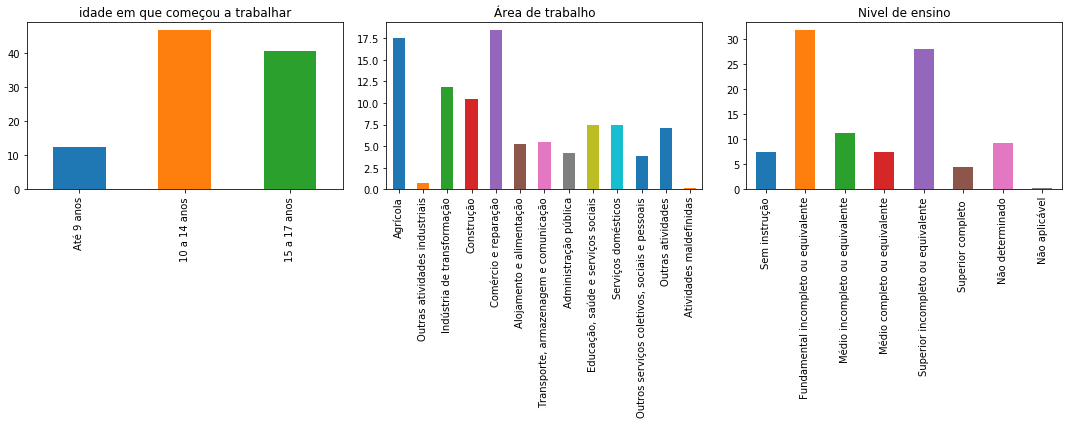

In [9]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(131)
plot = G1.plot(kind='bar',title='idade em que começou a trabalhar')

plt.subplot(132)
plot = G2.plot(kind='bar',title='Área de trabalho')

plt.subplot(133)
plot = G3.plot(kind='bar',title='Nivel de ensino')

plt.tight_layout()
plt.show()

In [10]:
C1=pd.crosstab(dados1['idade em que começou a trabalhar'],dados1['nivel de ensino'], margins=True, rownames=['começou a trabalhar'], colnames=['Nivel de ensino'], normalize=True)*100

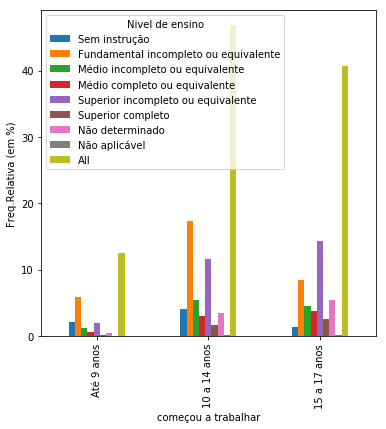

In [11]:
plot = C1.iloc[0:3,].plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [12]:
C2=pd.crosstab(dados1['idade em que começou a trabalhar'],dados1['Área de trabalho'], margins=True, rownames=['começou a trabalhar'], colnames=['Área de trabalho'], normalize=True)*100

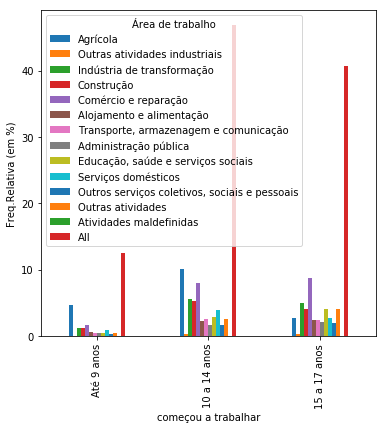

In [13]:
plot = C2.iloc[0:3,].plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [14]:
C3=pd.crosstab(dados1['idade em que começou a trabalhar'],dados1['Região'], margins=True, rownames=['começou a trabalhar'], colnames=['região'], normalize=True)*100
C3=C3.loc[['Até 9 anos', '10 a 14 anos', '15 a 17 anos'],['Norte', 'Nordeste', 'Centroeste', 'Sul', 'Sudeste']]
C3

região,Norte,Nordeste,Centroeste,Sul,Sudeste
começou a trabalhar,,,,,
Até 9 anos,2.017343,3.199186,1.841178,2.286721,3.082028
10 a 14 anos,7.136382,10.763152,5.839091,9.051105,13.657898
15 a 17 anos,5.248170,8.224157,5.058323,8.377232,14.218034


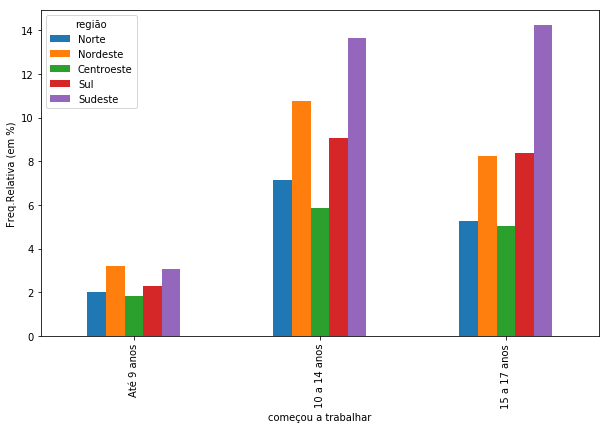

In [15]:
plot = C3.iloc[0:3,].plot(kind='bar',figsize=(10, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

(0, 5000)

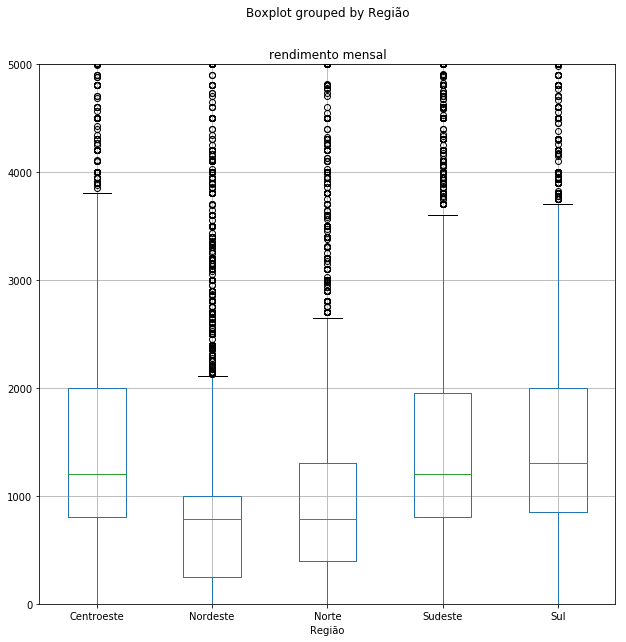

In [18]:
dados1[dados1["rendimento mensal"]<40000].boxplot(column="rendimento mensal",  by="Região", figsize=(10,10))
plt.ylim(0,5000)

___
## Análise e Resultados

Análise sobre o nivel de ensino da pessoa com a idade em que começou a trabalhar:

    Ao analisar o grafico gerado com as devidas variaveis, pude perceber que quando começam a trabalhar ate os 14 anos, o nivel de ensino que prevalece é o fundamental incompleto, ja quando começam entre 15 e 17 anos, o nivel que prevalece é o superior incompleto.

Análise sobre area em que começou a trabalhar com a idade em que começou a trabalhar:

    Analisando de uma forma geral, pude perceber, a partir do grafico gerado, que pessoas que comecam a trabalhar na faixa de ate 9 anos e na faixa de 10 a 14 anos, tendem a trabalhar na area agrícola e as pessoas que comecam a trabalhar na faixa de 15 a 17 anos, vão para a área do comércio e reparação.

Análise idade que começou a trabalhar por região:

    Ao analisar, de forma geral, por regiões, pude perceber que até os 9 anos no Nordeste possui um maior numero número de pessoas começando a trabalhar e logo em seguida vem o Sudeste. Agora ao analisar a coluna de 10 a 14 anos, podemos observar que o sudeste ultrapassa o nordeste e vira a região com maior número de pessoas começando a trabalhar e nessa mesma faixa etária, a frequnacia da região sul, sobe drasticamente e começa a alcançar o nordeste. fazendo uma ultima analise, na culona de 15 a 17 anos, observamos que o sudeste é, disparadamente, a região com maior frequencia de pessoas começanmdo a trabalhar e que a região sul alcança a região nordeste e ambas ficam com a mesma frequencia. Tanto a região Norte como a região centroeste, andam juntas quase que o tempo todo, e ambas com as menores frequencias de todas as regiões.
    

Análise do boxplot renda por região:

    Centroeste: analisando essa região podemos perceber que 75% dos entrevistados possuem uma renda maior que a mediana da região e 25% dos entrevistados possuem uma renda menor.
    
    Nordeste: já o nordeste possue um caso oposto ao do centroeste, em que a maior parte da sua população se encontra abaixo da mediana.
    
    Norte: na região norte podemos observar que quase 50% da populaçao entrevistada esta acima da mediana e 50% esta abaixo da mediana.
    
    Sudeste: analisando essa região podemos perceber que 75% dos entrevistados possuem uma renda maior que a mediana da região e 25% dos entrevistados possuem uma renda menor.
    
    Sul: tanto esse região quanto a região Centroeste e Sudeste, possuem a mesma caracteristica, em que 75% da populaçao entrevistada esta a cima da mediana e 25% esta abaixo da mediana.

___
## Conclusão 

Para responder minha pergunta, separei ela em duas partes, uma para responder sobre a renda com a idade em que começa a trabalhar e a outra sobre a escolaridade, a idade em que começa a trabalhar e o local onde acaba trabalhando.

Para a primeira parte, após analisar os gráficos correspondentes a ela, que eu separei por região para assim ser mais fácil de ver tudo, eu pude perceber que o comportamento deles seguiu diferente do que eu imaginava, pois ao observar bem pude perceber que a maior quantidade de crianças trabalhando foi na região sudeste, onde a renda de 75% da populaçao entrevistada é maior que a mediana, e eu imaginava que seria em uma região que possuisse uma menor renda, pois assim as pessoas trabalhariam para sobreviver desde cedo.

Para a segunda parte eu analisei escolaridade, a idade em que começa a trabalhar e o local onde acaba trabalhando, com isso pude perceber que a maior parte das pessoas nao terminam po fundamental ou o superior, e por essa razão acabam trabalhando na area agricola e na area de comercio, pois não e necessario uym diploma para isso.

A partir disso, podemos concluir que a partir dos dois parâmetros comentados acima, o trabalho infantil é maior na região do sudeste e que dado que a maior taxa de pessoas que começam a trabalhar possuem até 14 anos e não possuem o fundamental completo, concluimos que o trabalho infantil é maior em uma área com grande desigualdade de renda.